**Project-1**

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

1. Import and store the data in a data frame. (2.5 points)
2. Remove the outliers from the data (5 points)
3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7. Print the coefficients & intercepts of the linear regression model (5 points)
8. Print the accuracy of the overall model (2.5 points)

**Q1 - Import and store the data in a data frame. (2.5 points)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Columna Names given to  dataset
colnames=['City1','City2','AvgFare','Distance','AvgWeekPsgrs',
          'MktLeadArLn','MktShare','AvgFare_2','LowPriceArLn','MktShare_2','Price'] 

airq = pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat', names=colnames)


In [4]:
airq.head()

,City1,City2,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFare_2,LowPriceArLn,MktShare_2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


**Q2 - Remove the outliers from the data (5 points)**

**Exploratory Data Analysis**

In [7]:
print(airq.isnull().values.any())
airq.info()
airq.select_dtypes(include=['object']).nunique()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1           1000 non-null object
City2           1000 non-null object
AvgFare         1000 non-null float64
Distance        1000 non-null int64
AvgWeekPsgrs    1000 non-null float64
MktLeadArLn     1000 non-null object
MktShare        1000 non-null float64
AvgFare_2       1000 non-null float64
LowPriceArLn    1000 non-null object
MktShare_2      1000 non-null float64
Price           1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


City1           90
City2           85
MktLeadArLn     16
LowPriceArLn    19
dtype: int64

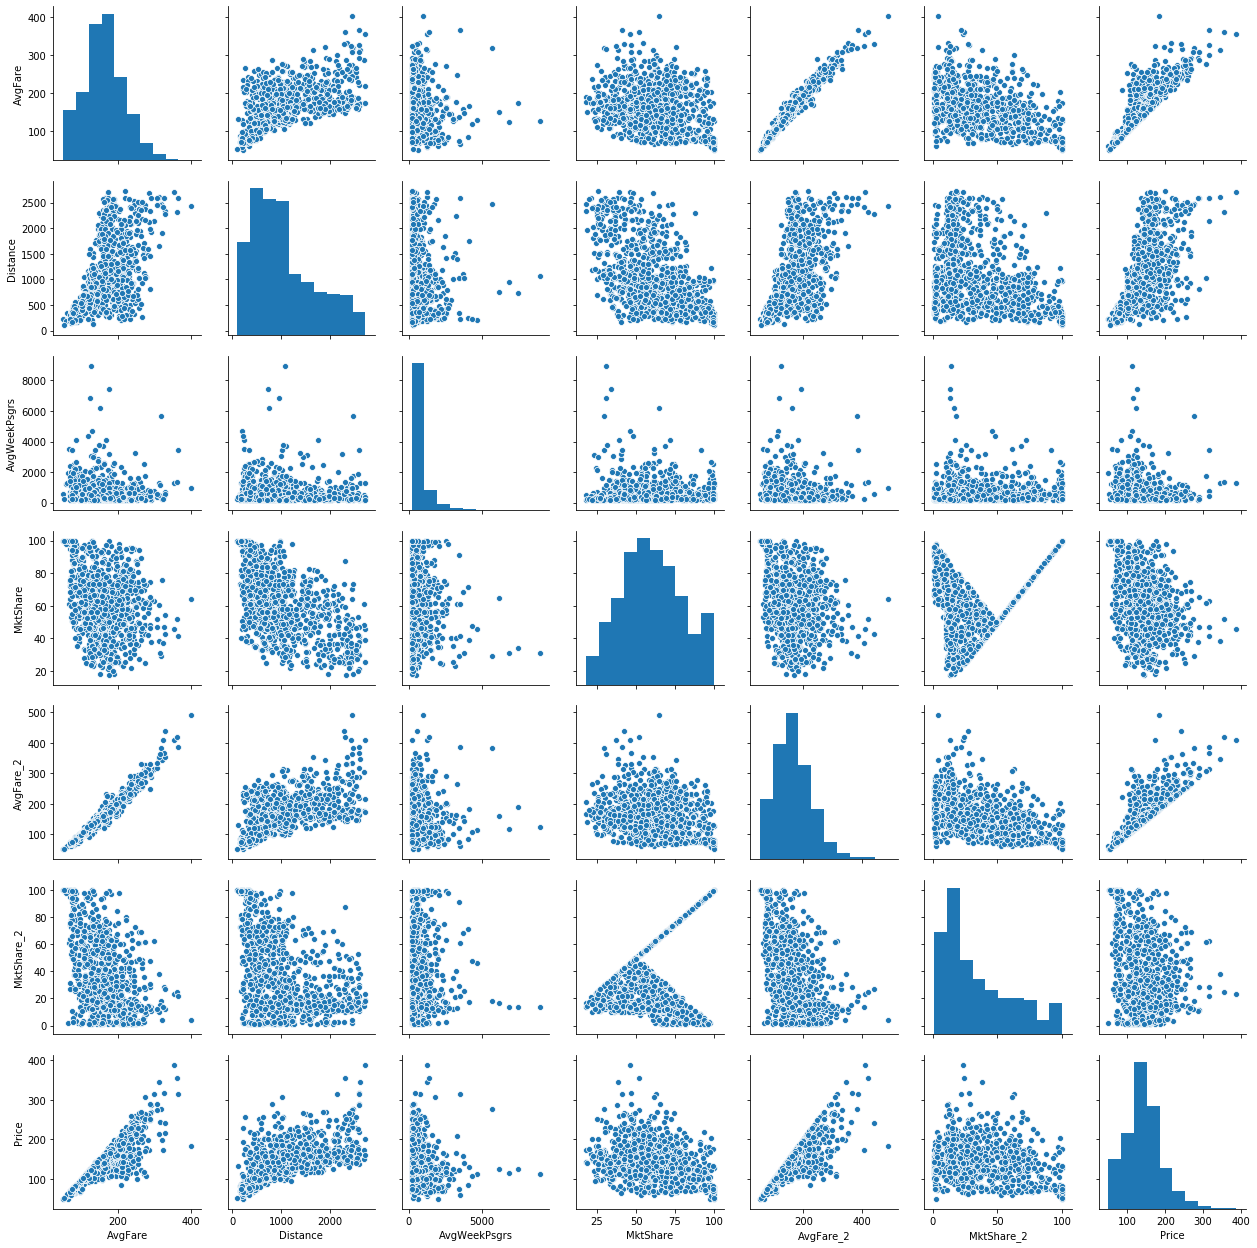

In [8]:
sns.pairplot(airq)

There is strong linear relationships among the AvgFares and Price

unique locations: 104 | unique airlines: 19


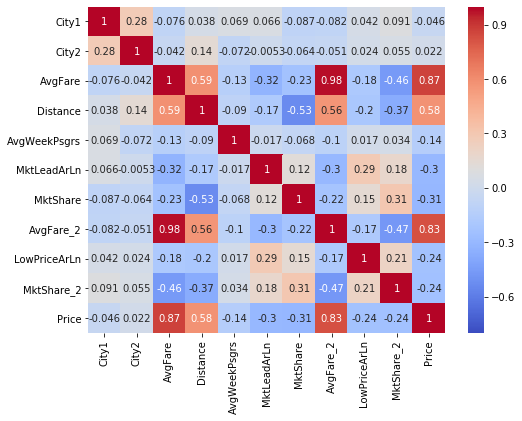

In [12]:
cats = ['City1','City2','MktLeadArLn','LowPriceArLn']
city_stack = airq.City2.append(airq.City1)
airln_stack = airq.MktLeadArLn.append(airq.LowPriceArLn)
airq[cats] = airq[cats].astype('category')
airq_enc = airq.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
print('unique locations: {} | unique airlines: {}'.format(city_stack.nunique(), airln_stack.nunique()))
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(airq_enc.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

In [17]:
Q1 = airq.quantile(0.25)
Q3 = airq.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#print the airq before excluding the outlier
print(airq.shape)

minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
print(minimum)
print(maximum)

AvgFare          71.4175
Distance        899.0000
AvgWeekPsgrs    512.7150
MktShare         27.0000
AvgFare_2        78.8925
MktShare_2       39.7775
Price            54.7625
dtype: float64
(1000, 11)
AvgFare          18.84875
Distance       -795.00000
AvgWeekPsgrs   -511.87500
MktShare          6.01000
AvgFare_2         5.74625
MktShare_2      -46.47125
Price            31.62375
dtype: float64
AvgFare          304.51875
Distance        2801.00000
AvgWeekPsgrs    1538.98500
MktShare         114.01000
AvgFare_2        321.31625
MktShare_2       112.63875
Price            250.67375
dtype: float64


In [18]:
k = (IQR.to_frame().T.columns)

In [19]:
airq1 = airq[k]

In [21]:
outliers_removed = airq1[(airq1 > minimum) & (airq1 < maximum)].dropna()
outliers_removed.head()

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFare_2,MktShare_2,Price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [22]:
outliers_removed.describe()

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFare_2,MktShare_2,Price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,160.292068,1039.383051,499.132644,60.636938,162.589051,34.373028,140.431073
std,48.468895,615.224361,327.573566,19.361447,53.288002,27.183305,39.849789
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.600000,564.000000,249.020000,47.020000,125.590000,13.060000,115.110000
50%,160.710000,914.000000,372.930000,59.750000,160.740000,26.250000,138.020000
75%,194.050000,1381.000000,644.560000,74.660000,198.470000,52.930000,166.260000
max,288.580000,2724.000000,1519.890000,100.000000,315.860000,100.000000,250.020000


**Q3 - Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (3 points)**

In [23]:
X = outliers_removed.drop(['AvgFare'], axis=1) #independent variables
y = outliers_removed[['AvgFare']]    #Dependent Variable

In [25]:
print(X)
print(y)

     Distance  AvgWeekPsgrs  MktShare  AvgFare_2  MktShare_2   Price
0         528        424.56     70.19     111.03       70.19  111.03
1         860        276.84     75.10     123.09       17.23  118.94
2         852        215.76     78.89     223.98        2.77  167.12
3         288        606.84     96.97      68.86       96.97   68.86
4         723        313.04     39.79     161.36       15.34  145.42
5        1204        199.02     40.68     137.97       17.09  127.69
6        2237        237.17     59.94     148.59       59.94  148.59
7        2467        191.95     17.89     205.06       16.59  174.00
8        1073        550.54     76.84     127.69       76.84  127.69
9        1130        202.93     35.40     132.91       26.40  124.78
10       1269        198.80     68.39     226.79       11.91  200.93
11       1670        312.39     49.16     180.49       14.37  161.39
12       1121        364.78     45.94     174.62       33.87  163.22
13        580        839.78     71

**Q4 - Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)**

In [29]:
corr = (outliers_removed.corr()['AvgFare'].abs() < 0.1).to_frame() 
corr

,AvgFare
AvgFare,False
Distance,False
AvgWeekPsgrs,False
MktShare,False
AvgFare_2,False
MktShare_2,False
Price,False


In [30]:
corr = corr[corr == True].dropna(axis=0)
corr.T.columns

Index([], dtype='object')

In [41]:
X = X.drop(corr.T.columns,axis=1)
print(X)

     Distance  AvgWeekPsgrs  MktShare  AvgFare_2  MktShare_2   Price
0         528        424.56     70.19     111.03       70.19  111.03
1         860        276.84     75.10     123.09       17.23  118.94
2         852        215.76     78.89     223.98        2.77  167.12
3         288        606.84     96.97      68.86       96.97   68.86
4         723        313.04     39.79     161.36       15.34  145.42
5        1204        199.02     40.68     137.97       17.09  127.69
6        2237        237.17     59.94     148.59       59.94  148.59
7        2467        191.95     17.89     205.06       16.59  174.00
8        1073        550.54     76.84     127.69       76.84  127.69
9        1130        202.93     35.40     132.91       26.40  124.78
10       1269        198.80     68.39     226.79       11.91  200.93
11       1670        312.39     49.16     180.49       14.37  161.39
12       1121        364.78     45.94     174.62       33.87  163.22
13        580        839.78     71

**Q5 - Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)**

In [32]:
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

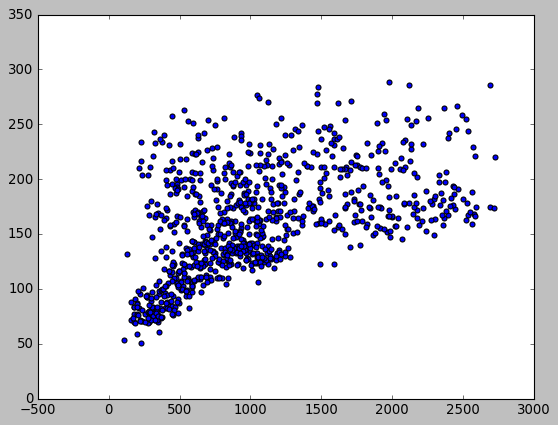

In [42]:
plt.scatter(x="Distance", y="AvgFare", data=outliers_removed)

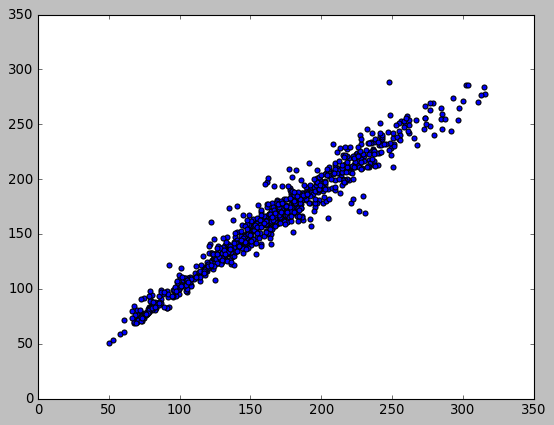

In [43]:
plt.scatter(x="AvgFare_2", y="AvgFare", data=outliers_removed)

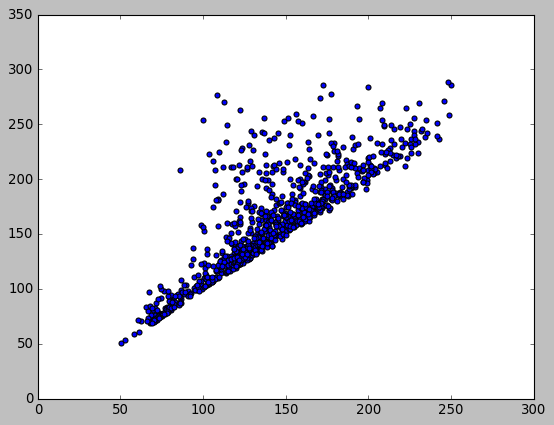

In [44]:
plt.scatter(x="Price", y="AvgFare", data=outliers_removed)

**Q6 - Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)**

In [45]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
regression_model = LinearRegression()

In [46]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Q7 - Print the coefficients & intercepts of the linear regression model (5 points)**

In [47]:
pd.DataFrame(regression_model.coef_[0],X_train.columns)

,0
Distance,0.002681
AvgWeekPsgrs,-0.003401
MktShare,0.077984
AvgFare_2,0.729859
MktShare_2,-0.032056
Price,0.232008


In [54]:
regression_model.intercept_

array([4.08454834])

In [55]:
# The coefficients
print('Coefficients: \n', regression_model.coef_)

Coefficients: 
 [[ 0.00268056 -0.00340126  0.07798353  0.72985912 -0.03205603  0.23200788]]


In [59]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regression_model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 72.14
Variance score: 0.97


In [49]:
regression_model.score(X_test, y_test)

0.9699617495264753

In [52]:
accuracy = regression_model.score(X_test,y_test)
print(accuracy*100,'%')

96.99617495264754 %


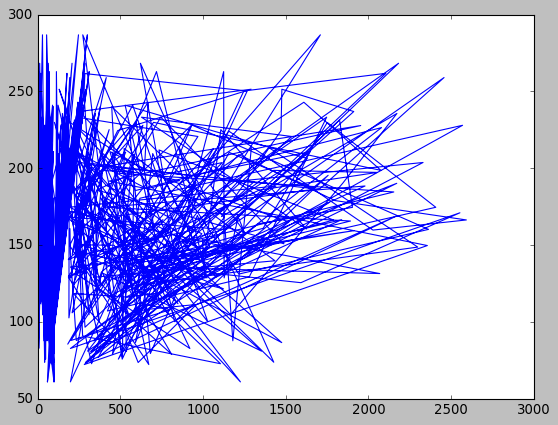

In [70]:
# Plot outputs

#X_train, X_test, y_train, y_test
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue')